In [1]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import cm
from datetime import datetime
import glob
import os
import json
import pickle
import six
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

In [2]:
df1=pd.read_csv(r"/Users/amolverma/Downloads/Datasets/Inflight Service_Inventory data.csv")
df2=pd.read_csv(r"/Users/amolverma/Downloads/Datasets/Inflight Service_Pre order data.csv")
df3=pd.read_csv(r"/Users/amolverma/Downloads/Datasets/Survey data _Customer comments.csv")
df4=pd.read_csv(r"/Users/amolverma/Downloads/Datasets/Survey data_Inflight Satisfaction Score.csv")                

In [3]:
path = '/Users/amolverma/Downloads/Datasets'
extension = 'csv'
os.chdir('/Users/amolverma/Downloads/Datasets')
result = glob.glob('*.{}'.format('csv'))
print(result)

['Inflight Service_Inventory data.csv', 'Survey data _Customer comments.csv', 'Survey data_Inflight Satisfaction Score.csv', 'Inflight Service_Pre order data.csv']


In [4]:
all_dataframes = [] # list to store each data frame separately
for csv in result:
    df = pd.read_csv(csv)
    all_dataframes.append(df)
all_dataframes[0].head() 

# 0 for inventory data
# 1 for customer comments
# 2 for inflight satisfaction
# 3 for preorder data

,flight_number,departure_station_code,arrival_station_code,scheduled_departure_dtl,entree_product_id,entree_description,entree_code,planned_entree_count,consumed_entree_count
0,2634,IAX,PDX,9/1/2022,58019,Belgium waffle,WF,20,32
1,2666,ORX,IAX,9/1/2022,60549,Vegetarian chili and polenta cake,V,3,0
2,2310,DEX,SAX,9/2/2022,58981,Scrambled eggs,O,9,7
3,1712,SFX,CLX,9/4/2022,58764,Mediterranean Falafel Bowl,V,1,0
4,1225,LAX,HNX,9/8/2022,60549,Vegetarian chili and polenta cake,V,1,0


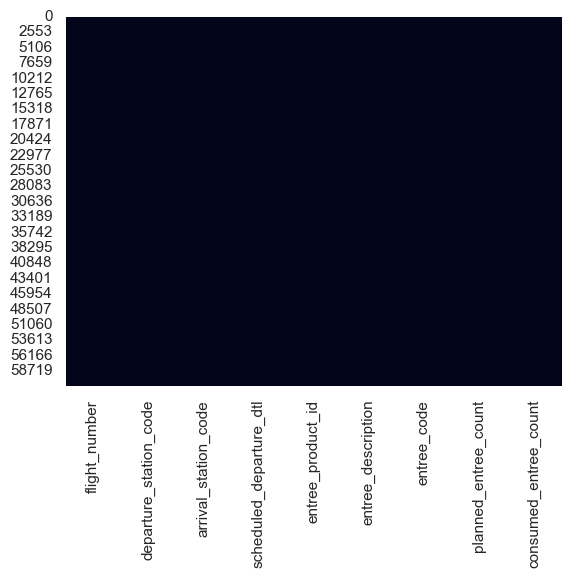

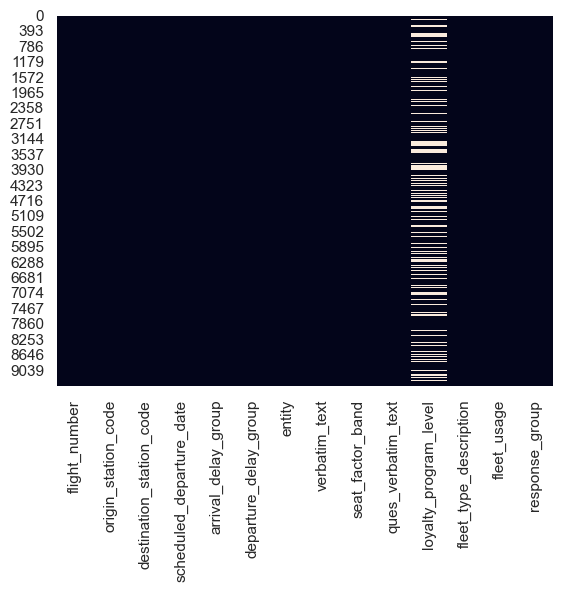

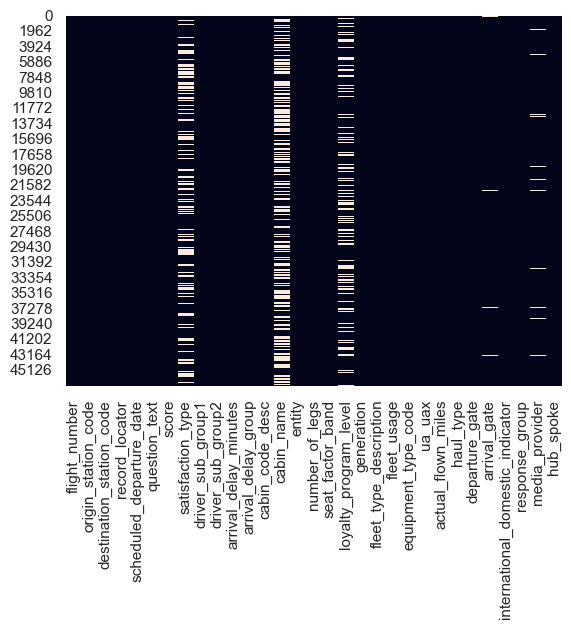

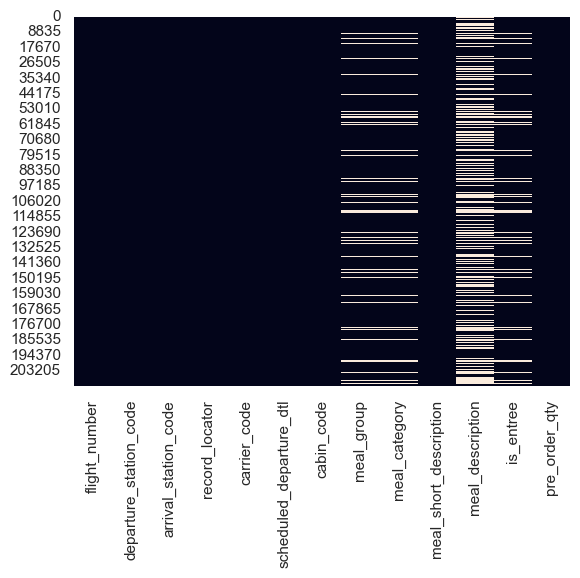

<Figure size 640x480 with 0 Axes>

In [5]:
for df in all_dataframes:
    sns.heatmap(df.isnull(), cbar=False)
    plt.figure()

In [6]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/amolverma/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
feedbacks = df3['verbatim_text'].tolist()

In [8]:
sid = SentimentIntensityAnalyzer()

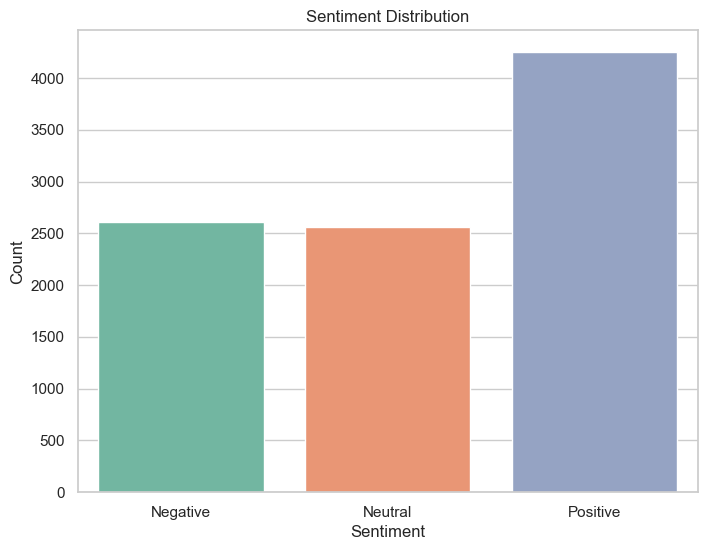

In [9]:
sentiment_scores = []

for feedback in feedbacks:
    sentiment = sid.polarity_scores(feedback)
    sentiment_scores.append(sentiment)

    positive_threshold = 0.05
    negative_threshold = -0.05
    sentiment_labels = []

for sentiment in sentiment_scores:
    if sentiment['compound'] > positive_threshold:
        sentiment_labels.append('Positive')
    elif sentiment['compound'] < negative_threshold:
        sentiment_labels.append('Negative')
    else:
        sentiment_labels.append('Neutral')

# Visualization
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x=sentiment_labels, palette="Set2")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


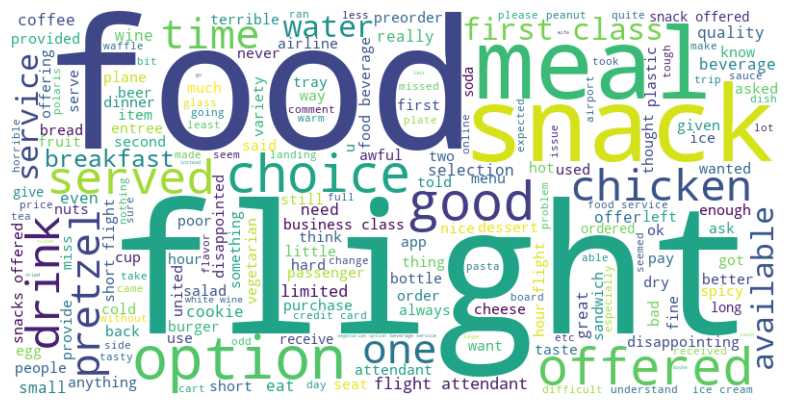

In [15]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string

# Load the customer comments/feedback dataset
data = pd.read_csv('/Users/amolverma/Downloads/Datasets/Survey data _Customer comments.csv')  # Replace with your file path

# Initialize NLTK's VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Preprocess and analyze the comments
def analyze_sentiment(comment):
    sentiment = sid.polarity_scores(comment)
    return sentiment

data['sentiment'] = data['verbatim_text'].apply(analyze_sentiment)

# Filter only negative comments
negative_comments = data[data['sentiment'].apply(lambda x: x['compound'] < 0)]

# Preprocessing functions
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Tokenization
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Apply preprocessing to negative comments
negative_comments['processed_text'] = negative_comments['verbatim_text'].apply(preprocess_text)

# Combine processed text of all negative comments
combined_text = ' '.join(negative_comments['processed_text'])

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

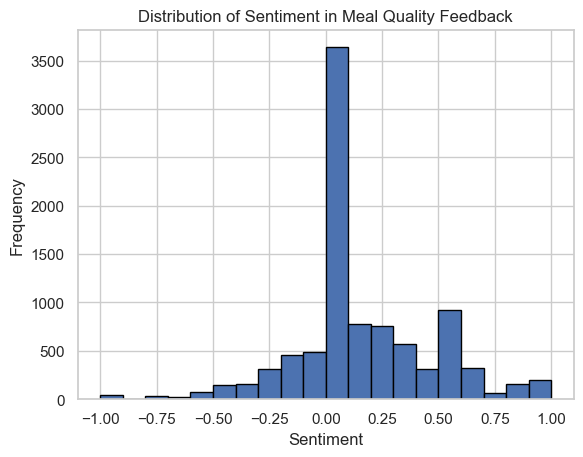

In [32]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Perform sentiment analysis
df3['sentiment'] = df3['verbatim_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualize sentiment distribution
plt.hist(df3['sentiment'], bins=20, edgecolor='black')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment in Meal Quality Feedback')
plt.show()

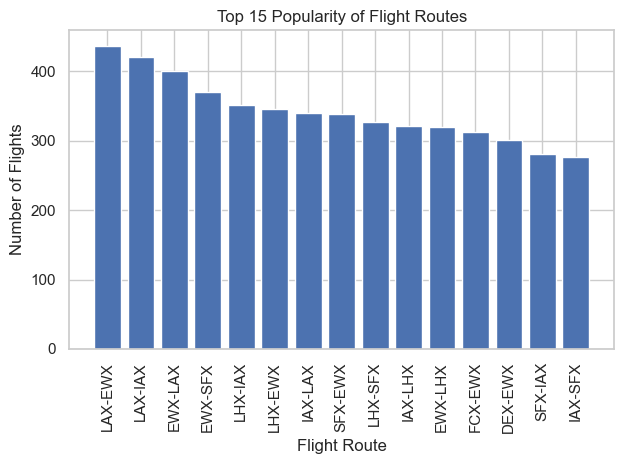

In [36]:
df4['flight_route'] = df4['origin_station_code'] + '-' + df4['destination_station_code']

# Calculate route popularity
route_popularity = df4['flight_route'].value_counts()

top_n = 15  # Replace with the desired number of top routes
top_routes = route_popularity[:top_n]

# Visualize top routes' popularity
plt.bar(top_routes.index, top_routes.values)
plt.xlabel('Flight Route')
plt.ylabel('Number of Flights')
plt.title(f'Top {top_n} Popularity of Flight Routes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [45]:
# Convert 'score' column to numeric, converting non-numeric values to NaN
df4['score'] = pd.to_numeric(df4['score'], errors='coerce')

# Filter out rows with NaN scores
filtered_data = df4.dropna(subset=['score'])


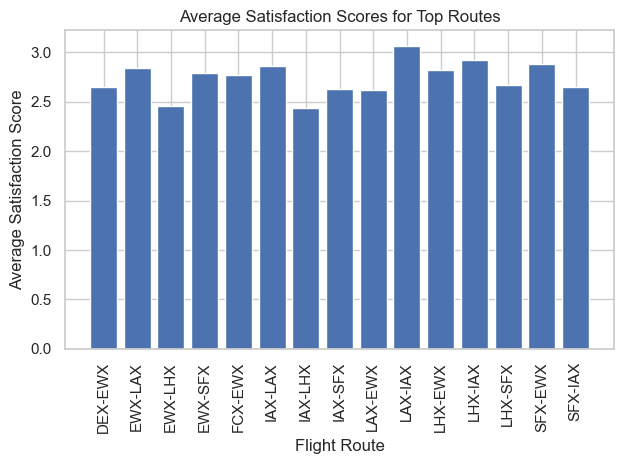

In [48]:
# Convert 'score' column to numeric, converting non-numeric values to NaN
df4['score'] = pd.to_numeric(df4['score'], errors='coerce')

# Calculate route popularity
route_popularity = df4['flight_route'].value_counts()

# Limit the displayed routes to the top N routes
top_n = 15  # Replace with the desired number of top routes
top_routes = route_popularity[:top_n].index

# Filter data for top routes
filtered_data = df4[df4['flight_route'].isin(top_routes)]
filtered_data = filtered_data.dropna(subset=['score'])  # Remove rows with NaN scores

# Calculate average satisfaction score for each route
average_scores_by_route = filtered_data.groupby('flight_route')['score'].mean()

# Visualize average satisfaction scores for top routes
plt.bar(average_scores_by_route.index, average_scores_by_route.values)
plt.xlabel('Flight Route')
plt.ylabel('Average Satisfaction Score')
plt.title('Average Satisfaction Scores for Top Routes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [57]:
# Calculate average satisfaction score for each flight
average_scores_by_flight = df4.groupby('flight_number')['score'].mean()

# Find the bottom 10 flights with lowest average scores
bottom_10_average_scores = average_scores_by_flight.nsmallest(10)

print("Bottom 10 flights with lowest average scores:")
print(bottom_10_average_scores)


Bottom 10 flights with lowest average scores:
flight_number
446     1.0
573     1.0
1015    1.0
1086    1.0
1096    1.0
1139    1.0
1267    1.0
1646    1.0
1749    1.0
1942    1.0
Name: score, dtype: float64


In [56]:
# Calculate average satisfaction score for each flight
average_scores_by_flight = df4.groupby('flight_number')['score'].mean()

# Find the top 10 flights with highest average scores
top_10_average_scores = average_scores_by_flight.nlargest(10)

print("Top 10 flights with highest average scores:")
print(top_10_average_scores)

Top 10 flights with highest average scores:
flight_number
96      5.0
151     5.0
520     5.0
676     5.0
825     5.0
829     5.0
1164    5.0
1295    5.0
1442    5.0
1466    5.0
Name: score, dtype: float64


In [59]:
# Calculate average satisfaction score for each flight
average_scores_by_flight = df4.groupby('flight_number')['score'].mean()

# Find flights with the highest average scores
top_flights = average_scores_by_flight.nlargest(10).index

# Filter food data for top flights
food_data_top_flights = df1[df1['flight_number'].isin(top_flights)]

# Get the consumed food items for the top flights
consumed_food_items = food_data_top_flights['entree_description'].unique()

print("Food items consumed in flights with highest satisfaction scores:")
print(consumed_food_items)

Food items consumed in flights with highest satisfaction scores:
['Chicken roulade' 'Stir-fried egg noodles' 'Scrambled eggs'
 'Belgium waffle' 'Gingerbread French Toast' 'Tomato and kale baked egg'
 'Impossible Meatball Bowl' 'Sauteed sea bass' 'Omelette entree'
 'Mushroom omelette' 'Horchata steel cut oatmeal' 'Raisin French toast'
 'Gluten-free Meal' 'Zatar chicken']


In [63]:
from collections import Counter

# Preprocess and tokenize feedback comments
df3['processed_comments'] = df3['verbatim_text'].apply(preprocess_text)
tokens = df3['processed_comments'].apply(nltk.word_tokenize)

# Flatten the list of tokens
all_tokens = [token for sublist in tokens for token in sublist]

# Count word frequencies
word_freq = Counter(all_tokens)

# List of keywords you want to analyze
keywords = ['impressed', 'friendly', 'tasty', 'delicious', 'quality']

# Count occurrences of keywords
keyword_counts = {keyword: word_freq[keyword] for keyword in keywords}

print("Keyword Counts in Customer Feedback Comments:")
print(keyword_counts)


Keyword Counts in Customer Feedback Comments:
{'impressed': 15, 'friendly': 26, 'tasty': 117, 'delicious': 115, 'quality': 246}


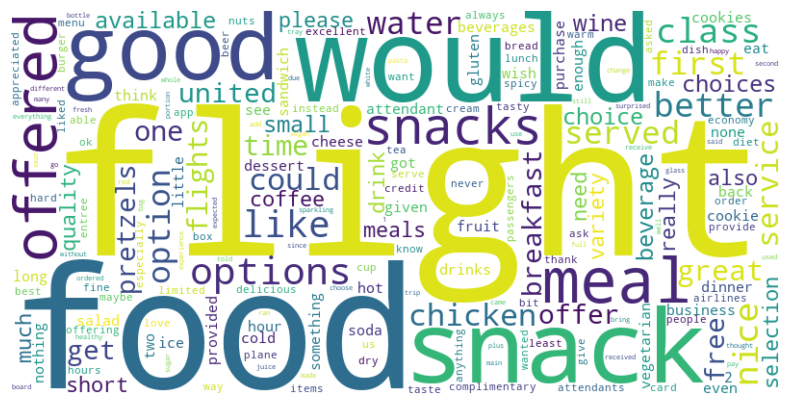

In [65]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Preprocess text and tokenize
def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token.isalnum()]  # Remove non-alphanumeric tokens
    tokens = [token for token in tokens if token not in stopwords.words('english')]  # Remove stopwords
    return tokens

df3['processed_comments'] = df3['verbatim_text'].apply(preprocess_text)

# Flatten the list of tokens
all_tokens = [token for sublist in df3['processed_comments'] for token in sublist]

# Calculate word frequencies
word_freq = Counter(all_tokens)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [90]:
# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

# Apply sentiment analysis and categorize sentiment
df3['sentiment_score'] = df3['verbatim_text'].apply(get_sentiment_score)
df3['sentiment'] = df3['sentiment_score'].apply(lambda score: 'positive' if score > 0 else ('neutral' if score == 0 else 'negative'))

# Categorize feedback comments based on membership status
df3['membership_category'] = df3['loyalty_program_level'].apply(lambda status: 'Loyalty Member' if status == 'member' else 'Non-Loyalty Member')

# Calculate sentiment distribution for membership categories
sentiment_distribution = df3.groupby(['membership_category', 'sentiment'])['verbatim_text'].count() / df3.groupby('membership_category')['verbatim_text'].count()

print("Sentiment Distribution by Membership Category:")
print(sentiment_distribution)


Sentiment Distribution by Membership Category:
membership_category  sentiment
Non-Loyalty Member   negative     0.280560
                     neutral      0.264219
                     positive     0.455221
Name: verbatim_text, dtype: float64


In [67]:
# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

# Apply sentiment analysis and categorize sentiment
df3['sentiment_score'] = df3['verbatim_text'].apply(get_sentiment_score)
df3['sentiment'] = df3['sentiment_score'].apply(lambda score: 'positive' if score > 0 else ('neutral' if score == 0 else 'negative'))

# Extract unique entrees mentioned in the feedback
unique_entrees = set()
for comment in df3['verbatim_text']:
    for word in comment.lower().split():
        if word.endswith('entree'):
            unique_entrees.add(word)

# Calculate sentiment scores for comments mentioning each entree
entree_sentiment_scores = {}
for entree in unique_entrees:
    entree_comments = df3[df3['verbatim_text'].str.contains(entree, case=False)]
    avg_sentiment_score = entree_comments['sentiment_score'].mean()
    entree_sentiment_scores[entree] = avg_sentiment_score

# Print the sentiment scores for each entree
for entree, score in entree_sentiment_scores.items():
    print(f"Entree: {entree}, Avg Sentiment Score: {score:.2f}")


Entree: entree, Avg Sentiment Score: 0.16


In [72]:
# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

# Apply sentiment analysis
df3['sentiment_score'] = df3['verbatim_text'].apply(get_sentiment_score)

# Extract unique entrees
unique_entrees = ['chicken', 'beef', 'waffle', 'fish','breakfast']  # Add more entrees as needed

# Create a dictionary to store sentiment scores for each entree
entree_sentiment_scores = {entree: [] for entree in unique_entrees}

# Associate sentiment scores with entrees mentioned in the comments
for index, row in df3.iterrows():
    for entree in unique_entrees:
        if entree in row['verbatim_text'].lower():
            entree_sentiment_scores[entree].append(row['sentiment_score'])

# Calculate average sentiment scores for each entree
entree_avg_sentiment = {entree: sum(scores) / len(scores) if scores else 0 for entree, scores in entree_sentiment_scores.items()}

# Print the average sentiment scores for each entree
for entree, score in entree_avg_sentiment.items():
    print(f"Entree: {entree}, Avg Sentiment Score: {score:.2f}")


Entree: chicken, Avg Sentiment Score: 0.21
Entree: beef, Avg Sentiment Score: 0.17
Entree: waffle, Avg Sentiment Score: 0.20
Entree: fish, Avg Sentiment Score: 0.11
Entree: breakfast, Avg Sentiment Score: 0.22


In [70]:

# Merge dataframes based on flight_number
merged_data = df3.merge(df1, on='flight_number', how='inner')

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

# Apply sentiment analysis
merged_data['sentiment_score'] = merged_data['verbatim_text'].apply(get_sentiment_score)

# Calculate average sentiment score for each entree code
entree_avg_sentiment = merged_data.groupby('entree_code')['sentiment_score'].mean()

# Print the average sentiment scores for each entree code
for entree_code, score in entree_avg_sentiment.items():
    print(f"Entree Code: {entree_code}, Avg Sentiment Score: {score:.2f}")



Entree Code: AV, Avg Sentiment Score: 0.14
Entree Code: B, Avg Sentiment Score: 0.17
Entree Code: BR, Avg Sentiment Score: 0.16
Entree Code: C, Avg Sentiment Score: 0.16
Entree Code: C1, Avg Sentiment Score: 0.15
Entree Code: C2, Avg Sentiment Score: 0.21
Entree Code: C3, Avg Sentiment Score: 0.35
Entree Code: E, Avg Sentiment Score: 0.16
Entree Code: E1, Avg Sentiment Score: 0.14
Entree Code: E2, Avg Sentiment Score: 0.14
Entree Code: F, Avg Sentiment Score: 0.12
Entree Code: FB, Avg Sentiment Score: 0.17
Entree Code: FT, Avg Sentiment Score: 0.17
Entree Code: GF, Avg Sentiment Score: 0.13
Entree Code: KS, Avg Sentiment Score: 0.13
Entree Code: O, Avg Sentiment Score: 0.15
Entree Code: O2, Avg Sentiment Score: 0.19
Entree Code: OM, Avg Sentiment Score: 0.16
Entree Code: P, Avg Sentiment Score: 0.16
Entree Code: PC, Avg Sentiment Score: 0.37
Entree Code: PK, Avg Sentiment Score: 0.09
Entree Code: S, Avg Sentiment Score: 0.14
Entree Code: S1, Avg Sentiment Score: 0.15
Entree Code: S2, A

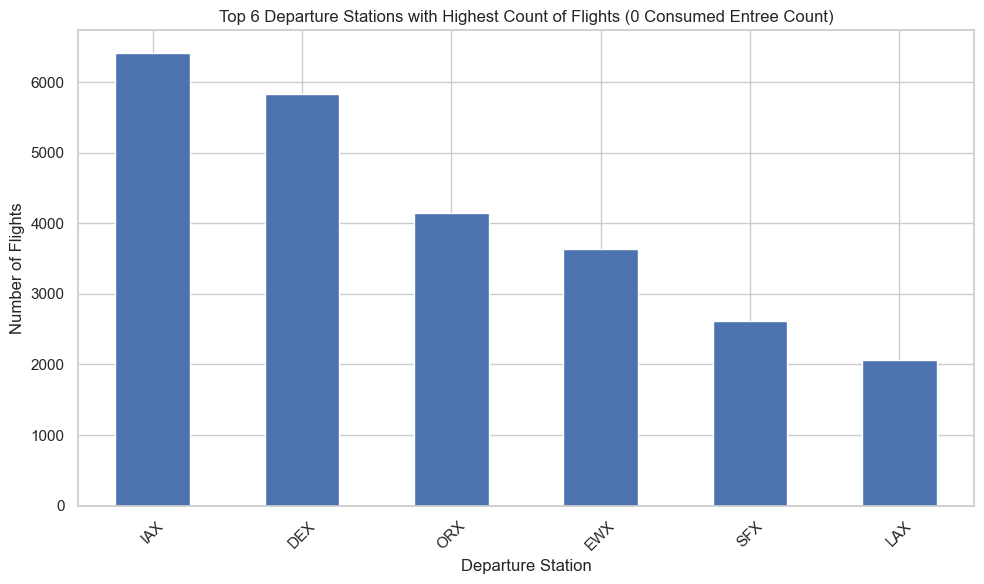

In [75]:
# Filter flights with 0 consumed entree count
flights_with_zero_entree_count = df1[df1['consumed_entree_count'] == 0]

# Count the number of flights with 0 consumed entree count for each departure station
flight_counts = flights_with_zero_entree_count['departure_station_code'].value_counts()

# Select the top 6 departure stations with highest flight counts
top_stations = flight_counts.head(6)

# Create a bar chart for top stations
plt.figure(figsize=(10, 6))
top_stations.plot(kind='bar')
plt.title('Top 6 Departure Stations with Highest Count of Flights (0 Consumed Entree Count)')
plt.xlabel('Departure Station')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






In [77]:
# Filter flights with 0 consumed entree count
flights_with_zero_entree_count = df1[df1['consumed_entree_count'] == 0]

# Count the number of flights with 0 consumed entree count for each departure station
flight_counts = flights_with_zero_entree_count['departure_station_code'].value_counts()

# Select the top 6 departure stations with highest flight counts
top_stations = flight_counts.head(6)

# Filter data for the top departure stations and flights with 0 consumed entree count
filtered_data = flights_with_zero_entree_count[flights_with_zero_entree_count['departure_station_code'].isin(top_stations.index)]

# Calculate the sum of planned entree counts for the filtered flights
planned_entree_counts = filtered_data.groupby(['departure_station_code', 'flight_number'])['planned_entree_count'].sum()

print(planned_entree_counts)



departure_station_code  flight_number
DEX                     234               111
                        239                28
                        243                29
                        244                25
                        260               121
                        281                97
                        295               224
                        296               102
                        303               254
                        314               155
                        315               127
                        319                81
                        321                58
                        328               180
                        330                92
                        348               307
                        362               201
                        385               462
                        393                 5
                        395                16
                        398               

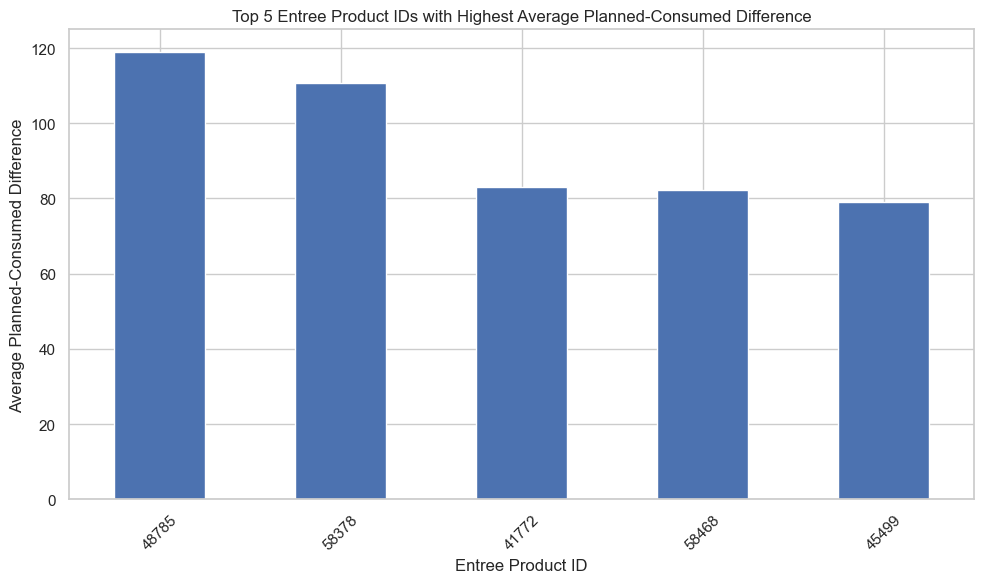

In [81]:
# Calculate planned-consumed difference for each entree product ID
df1['planned_consumed_difference'] = df1['planned_entree_count'] - df1['consumed_entree_count']

# Group by entree product ID and calculate the average planned-consumed difference
entree_average_difference = df1.groupby('entree_product_id')['planned_consumed_difference'].mean()

# Sort the average differences in descending order and select the top 5
top_entrees = entree_average_difference.nlargest(5)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_entrees.plot(kind='bar')
plt.title('Top 5 Entree Product IDs with Highest Average Planned-Consumed Difference')
plt.xlabel('Entree Product ID')
plt.ylabel('Average Planned-Consumed Difference')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [82]:
# Group by flight number and sum the consumed entree counts
grouped_flights = df1.groupby('flight_number')['consumed_entree_count'].sum()

# Filter flights with total consumed entree count as 0
flights_with_zero_consumed_entree = grouped_flights[grouped_flights == 0]

print(flights_with_zero_consumed_entree)


flight_number
194     0
202     0
205     0
241     0
273     0
274     0
280     0
350     0
444     0
511     0
535     0
543     0
552     0
556     0
573     0
575     0
581     0
602     0
645     0
800     0
920     0
1010    0
1098    0
1103    0
1130    0
1145    0
1148    0
1171    0
1172    0
1176    0
1211    0
1238    0
1441    0
1480    0
1510    0
1523    0
1532    0
1667    0
1686    0
1719    0
1732    0
1733    0
1734    0
1767    0
1775    0
1862    0
1895    0
1911    0
1949    0
1985    0
2021    0
2077    0
2086    0
2107    0
2112    0
2217    0
2219    0
2226    0
2227    0
2294    0
2314    0
2342    0
2375    0
2376    0
2459    0
2641    0
2681    0
3475    0
3536    0
3563    0
3586    0
3607    0
4660    0
4681    0
4697    0
4720    0
4725    0
4739    0
4760    0
5286    0
5302    0
5348    0
5376    0
5421    0
5519    0
5526    0
5532    0
5648    0
5667    0
5700    0
5703    0
5772    0
5891    0
6018    0
6049    0
6083    0
6103    0
6127    0
6128  

In [83]:
# Group by flight number and sum the consumed entree counts
grouped_flights = df1.groupby('flight_number')['consumed_entree_count'].sum()

# Filter flights with total consumed entree count as 0
flights_with_zero_consumed_entree = grouped_flights[grouped_flights == 0].index.tolist()

# Filter survey data for the flights with 0 consumed entree counts
survey_data_filtered = df4[df4['flight_number'].isin(flights_with_zero_consumed_entree)]

# Calculate the average satisfaction score for these flights
average_satisfaction = survey_data_filtered['score'].mean()

print("Flights with 0 consumed entree count:", flights_with_zero_consumed_entree)
print("Average satisfaction score for these flights:", average_satisfaction)


Flights with 0 consumed entree count: [194, 202, 205, 241, 273, 274, 280, 350, 444, 511, 535, 543, 552, 556, 573, 575, 581, 602, 645, 800, 920, 1010, 1098, 1103, 1130, 1145, 1148, 1171, 1172, 1176, 1211, 1238, 1441, 1480, 1510, 1523, 1532, 1667, 1686, 1719, 1732, 1733, 1734, 1767, 1775, 1862, 1895, 1911, 1949, 1985, 2021, 2077, 2086, 2107, 2112, 2217, 2219, 2226, 2227, 2294, 2314, 2342, 2375, 2376, 2459, 2641, 2681, 3475, 3536, 3563, 3586, 3607, 4660, 4681, 4697, 4720, 4725, 4739, 4760, 5286, 5302, 5348, 5376, 5421, 5519, 5526, 5532, 5648, 5667, 5700, 5703, 5772, 5891, 6018, 6049, 6083, 6103, 6127, 6128, 6132, 6139, 6341]
Average satisfaction score for these flights: 2.864864864864865


In [85]:
# Load the list of flight numbers with 0 consumed entree counts
flights_with_zero_consumed_entree = [194, 202, 205, 241, 273, 274, 280, 350, 444, 511, 535, 543, 552, 556, 573, 575, 581, 602, 645, 800, 920, 1010, 1098, 1103, 1130, 1145, 1148, 1171, 1172, 1176, 1211, 1238, 1441, 1480, 1510, 1523, 1532, 1667, 1686, 1719, 1732, 1733, 1734, 1767, 1775, 1862, 1895, 1911, 1949, 1985, 2021, 2077, 2086, 2107, 2112, 2217, 2219, 2226, 2227, 2294, 2314, 2342, 2375, 2376, 2459, 2641, 2681, 3475, 3536, 3563, 3586, 3607, 4660, 4681, 4697, 4720, 4725, 4739, 4760, 5286, 5302, 5348, 5376, 5421, 5519, 5526, 5532, 5648, 5667, 5700, 5703, 5772, 5891, 6018, 6049, 6083, 6103, 6127, 6128, 6132, 6139, 6341]  # Replace with your list of flight numbers

# Filter survey data for flights with 0 consumed entree count
feedback_for_zero_consumed_flights = df3[df3['flight_number'].isin(flights_with_zero_consumed_entree)]

# Display customer feedback for these flights
print(feedback_for_zero_consumed_flights[['flight_number', 'verbatim_text']])


      flight_number                                      verbatim_text
18             1667  The chicken entree was a thai chicken noodle. ...
20             1523  The travelers should be given 2 snacks instead...
24             4725  Not many it any gluten intolerant options. So ...
86              202  Need to change the menu. The food was not to a...
143            2376  I wondered why we were not given pretzels/nuts...
282            1775                       Excellent choices available.
297            2086  You used to give a snack cookie out. on the la...
340            1686  The entree was very dissatisfying regarding fl...
411             543          No - not much need for a one-hour flight.
491            1732  As our almost seven hour flight departed at 7:...
493            1686  There was no dressing for the salad. both the ...
675             202                                  Entree was cold!.
933             273  Ice cream was melted like water (was clearly d...
975   

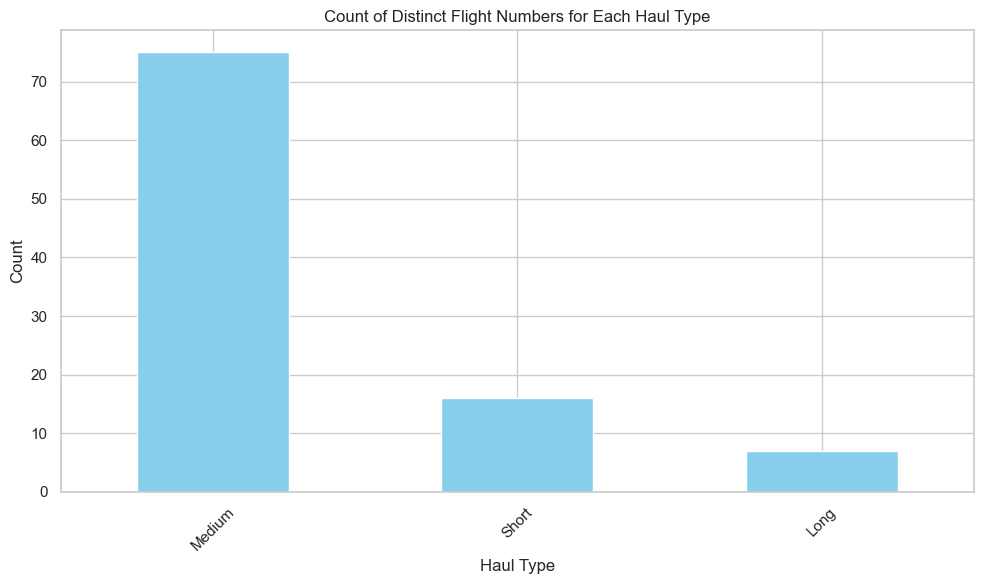

In [88]:
# Load the list of flight numbers with 0 consumed entree counts
flights_with_zero_consumed_entree = [194, 202, 205, 241, 273, 274, 280, 350, 444, 511, 535, 543, 552, 556, 573, 575, 581, 602, 645, 800, 920, 1010, 1098, 1103, 1130, 1145, 1148, 1171, 1172, 1176, 1211, 1238, 1441, 1480, 1510, 1523, 1532, 1667, 1686, 1719, 1732, 1733, 1734, 1767, 1775, 1862, 1895, 1911, 1949, 1985, 2021, 2077, 2086, 2107, 2112, 2217, 2219, 2226, 2227, 2294, 2314, 2342, 2375, 2376, 2459, 2641, 2681, 3475, 3536, 3563, 3586, 3607, 4660, 4681, 4697, 4720, 4725, 4739, 4760, 5286, 5302, 5348, 5376, 5421, 5519, 5526, 5532, 5648, 5667, 5700, 5703, 5772, 5891, 6018, 6049, 6083, 6103, 6127, 6128, 6132, 6139, 6341]  # Replace with your list of flight numbers

# Filter inflight service data for flights with 0 consumed entree count
haul_type_for_zero_consumed_flights = df4[df4['flight_number'].isin(flights_with_zero_consumed_entree)][['flight_number', 'haul_type']]

# Keep only distinct flight numbers
distinct_flights = haul_type_for_zero_consumed_flights.drop_duplicates(subset=['flight_number'])

plt.figure(figsize=(10, 6))
distinct_flights['haul_type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Count of Distinct Flight Numbers for Each Haul Type')
plt.xlabel('Haul Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
